In [6]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Function to fetch historical market cap data
def fetch_historical_data(coin_id, date_from, date_to):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        'vs_currency': 'usd',
        'from': datetime.strptime(date_from, "%Y-%m-%d").timestamp(),
        'to': datetime.strptime(date_to, "%Y-%m-%d").timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['market_caps']  # Replace 'prices' with 'market_caps' for market cap data
    df = pd.DataFrame(prices, columns=['timestamp', 'market_cap'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
    return df[['date', 'market_cap']]

# Terra UST and Terra LUNA ids from CoinGecko
terra_ust_id = 'terrausd'
terra_luna_id = 'terra-luna'  # This might need updating depending on the exact token identifier used by CoinGecko

# Fetch data
terra_ust_data = fetch_historical_data(terra_ust_id, '2021-01-01', '2022-05-31')
terra_luna_data = fetch_historical_data(terra_luna_id, '2021-01-01', '2022-05-31')

print(terra_ust_data)
print(terra_luna_data)


           date    market_cap
0    2021-01-02  1.826956e+08
1    2021-01-03  1.822642e+08
2    2021-01-04  1.829086e+08
3    2021-01-05  1.827767e+08
4    2021-01-06  1.863435e+08
..          ...           ...
510  2022-05-27  6.121602e+08
511  2022-05-28  3.916661e+08
512  2022-05-29  3.024705e+08
513  2022-05-30  3.152912e+08
514  2022-05-31  2.856680e+08

[515 rows x 2 columns]
           date    market_cap
0    2021-01-02  3.147676e+08
1    2021-01-03  3.057320e+08
2    2021-01-04  3.231924e+08
3    2021-01-05  3.175391e+08
4    2021-01-06  3.469149e+08
..          ...           ...
510  2022-05-27  9.988863e+08
511  2022-05-28  8.420104e+08
512  2022-05-29  7.688419e+08
513  2022-05-30  7.688419e+08
514  2022-05-31  7.688419e+08

[515 rows x 2 columns]


In [7]:

# Ensure the dates are the same format and set as index
terra_ust_data['date'] = pd.to_datetime(terra_ust_data['date'])
terra_luna_data['date'] = pd.to_datetime(terra_luna_data['date'])

terra_ust_data.set_index('date', inplace=True)
terra_luna_data.set_index('date', inplace=True)

# Join the two dataframes on the date index
combined_data = terra_luna_data.join(terra_ust_data, lsuffix='_luna', rsuffix='_ust')

# Calculate the ratio of LUNA's market cap to UST's market cap
combined_data['ratio'] = combined_data['market_cap_luna'] / combined_data['market_cap_ust']



In [8]:
dfp=combined_data.loc[:'2022-05-12']

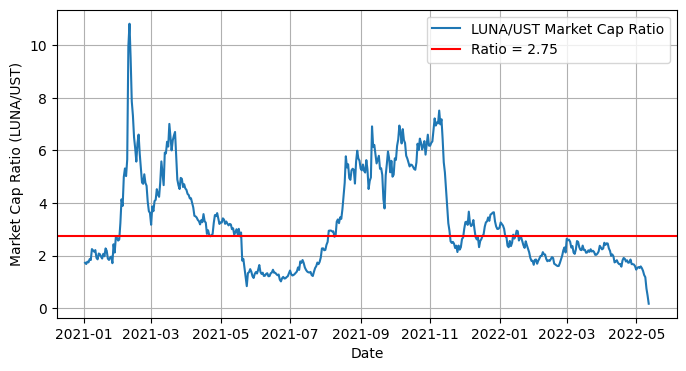

In [26]:
import matplotlib.pyplot as plt

# Plot the ratio
plt.figure(figsize=[8,4])
plt.plot(dfp.index, dfp['ratio'], label='LUNA/UST Market Cap Ratio')
plt.title('')
# plt.title('LUNA/UST Market Cap Ratio')
plt.xlabel('Date')
plt.ylabel('Market Cap Ratio (LUNA/UST)')

# Add a horizontal line at y=1.75
plt.axhline(y=2.75, color='r', linestyle='-', label='Ratio = 2.75')

plt.legend()
plt.grid(True)
plt.savefig('luna_ust_ratio.png', bbox_inches='tight')  # Saves the figure as a PNG file
plt.show()




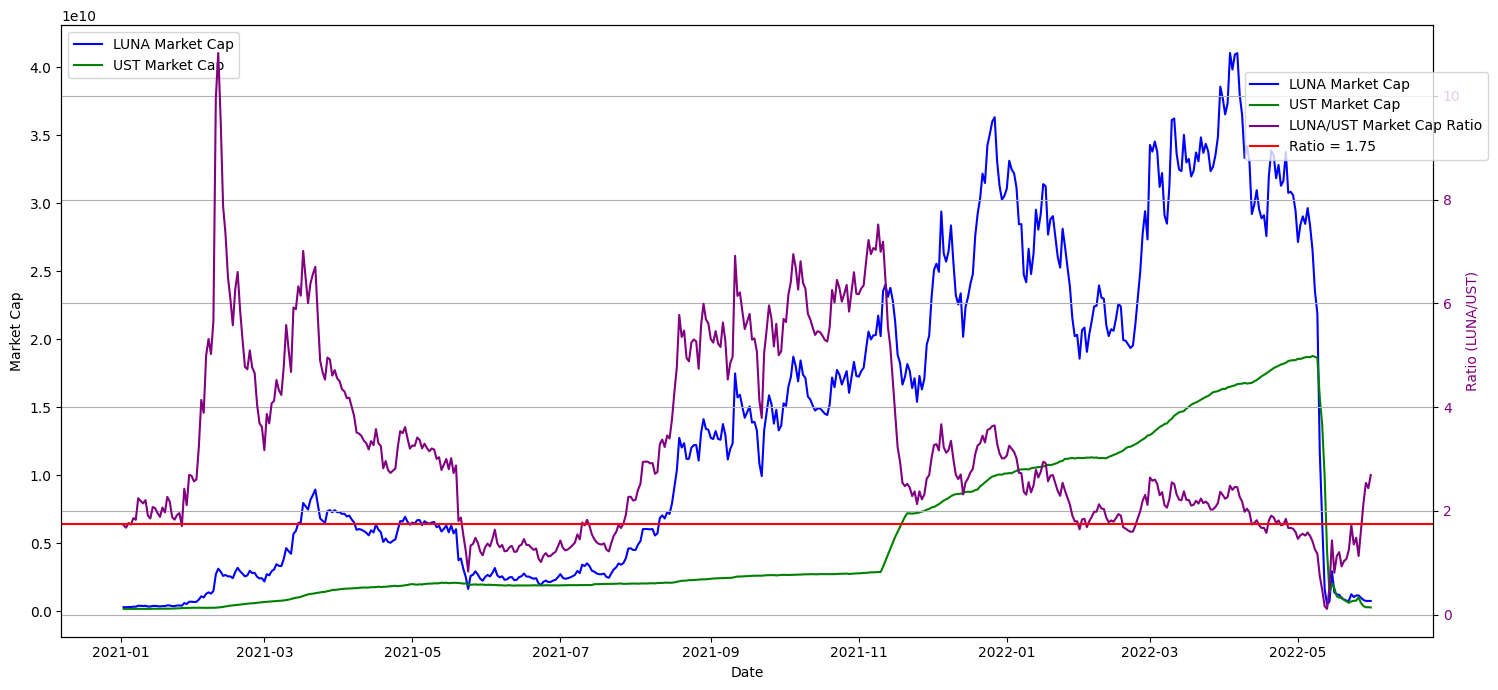

In [14]:
import matplotlib.pyplot as plt

# Plotting the market caps and the ratio
fig, ax1 = plt.subplots(figsize=[15,7])

# Make a plot for market caps
ax1.plot(combined_data.index, combined_data['market_cap_luna'], label='LUNA Market Cap', color='b')
ax1.plot(combined_data.index, combined_data['market_cap_ust'], label='UST Market Cap', color='g')

# Set labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('Market Cap', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Twin axis for ratio
ax2 = ax1.twinx()
ax2.plot(combined_data.index, combined_data['ratio'], label='LUNA/UST Market Cap Ratio', color='purple')
ax2.set_ylabel('Ratio (LUNA/UST)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Add a horizontal line at y=1.75 on the ratio axis
ax2.axhline(y=1.75, color='r', linestyle='-', label='Ratio = 1.75')

# Final touches
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1,0.9))
plt.title('')
plt.grid(True)
plt.show()


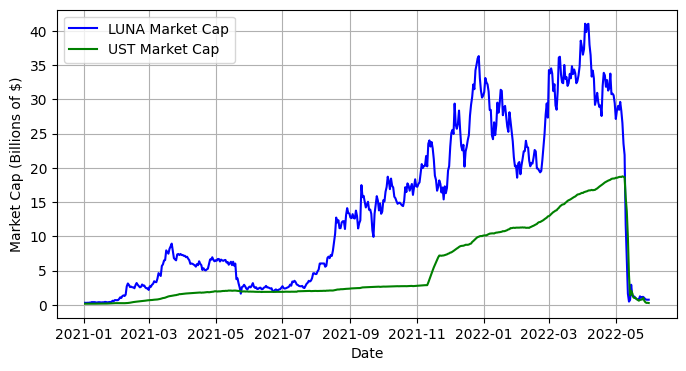

In [18]:
import matplotlib.pyplot as plt

# Convert market cap from dollars to billions of dollars for easier reading
combined_data['market_cap_luna_billion'] = combined_data['market_cap_luna'] / 1e9
combined_data['market_cap_ust_billion'] = combined_data['market_cap_ust'] / 1e9

# Plotting the market caps
plt.figure(figsize=[8,4])
plt.plot(combined_data.index, combined_data['market_cap_luna_billion'], label='LUNA Market Cap', color='b')
plt.plot(combined_data.index, combined_data['market_cap_ust_billion'], label='UST Market Cap', color='g')

# Set labels and titles
plt.xlabel('Date')
plt.ylabel('Market Cap (Billions of $)')
plt.title('')
plt.legend()
plt.grid(True)
plt.savefig('luna_ust_market_caps.png', bbox_inches='tight')  # Saves the figure as a PNG file
plt.show()


In [20]:
combined_data.loc['2022-05-07']

market_cap_luna            2.656518e+10
market_cap_ust             1.877047e+10
ratio                      1.415264e+00
market_cap_luna_billion    2.656518e+01
market_cap_ust_billion     1.877047e+01
Name: 2022-05-07 00:00:00, dtype: float64

In [24]:
combined_data.loc['2022-05-06'].round(2)

market_cap_luna            2.834115e+10
market_cap_ust             1.867402e+10
ratio                      1.520000e+00
market_cap_luna_billion    2.834000e+01
market_cap_ust_billion     1.867000e+01
Name: 2022-05-06 00:00:00, dtype: float64